<a href="https://colab.research.google.com/github/asthanas/DataScienceProjects/blob/master/zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective:**
Our goal in this notebook is to explore the data provided in Zomato csv and to analyze which restaurants have poor ratings in Zomato and why?

In [2]:
import pandas as pd                                 # Importing pandas
import numpy as np                                  # Importing numpy
import matplotlib.pyplot as plt                     # Importing matplotlib for visualization

%matplotlib inline                      
import seaborn as sns                               # Importing seaborn for visualization

import matplotlib.ticker as ticker
import matplotlib.cm as cm

import pandas_profiling                             # AUtomatic EDA

import ipywidgets as widgets                        # Creating widgets
from IPython.display import display                 # Displaying widgets

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Loading the datasets**
The csv file has encoding ISO-8859-1. Encoding defines what kind of characters(ASCII or non ASCII or something different) can be stored in a file.

In [3]:
zomato_df = pd.read_csv('zomato.csv',encoding = "ISO-8859-1")    # Reading file zomato.csv
#"utf-8"

In [ ]:
pip uninstall pandas-profiling


In [ ]:
pip install pandas-profiling

In [ ]:
pip install --upgrade pandas

In [ ]:
pip install pandas-profiling==1.4.3

# **Pandas Profiling**

In [ ]:
import pandas_profiling  
report = pandas_profiling.ProfileReport(zomato_df)                # Perform pandas profiling on the dataset    

report.to_file("zomato_data.html")                                # covert profile report as html file

In [ ]:
#Our observation oo Profiling 
  # Remove Resto ID --> Everything is unique
  # Resturant Name --> It may be important, if we are predicting rating since some of them might be chains and brands
        #You need to add one more column that adds if the name is a brand or not
        #Column with two catagory Band or non Brand
        #Add a column that says a name is catchy or not catchy
        #Cusine, Votes, other variable except name --> Can i predict rating.
            #There are new resturants which are added and we need to predict their rating for next 12 months
  #Country code
        #Just to analysis on India data which is major
        #May be seperate India and other country
        #only do analysis on outside India Data
        # If the problem is to predict ratings ; maybe sepreating India from other country may make sense. 
        # since it is a discrete column, we need to categorize it.

  # City Column 
      # Assuming we are only taking India 
        # Divide the data into North, Central, East, West South 
        # Take Delhi NCR, OtherIndianCities 
        # Tier1 Cities and Tier2 cities 
      # All Country Data 
        # Take Big Cities in INdia vs Big Cities outside 

 # Address Column , Locality Column , Locality Verbose
    # Unless we are only studying New Delhi, there's no pint of taking this column 
        # You will extract Localities - GK, Sectors etc 

 # Lat & Long -> ideally Ignore - Too many Uniques 
    # YOu can take it if you create nearby zones (range)
    # we can create category like; Posh,Happening,Corporate Areas,MiddleClass, Student,Residential?
    # Ideally, we don't know these datapoints, you have to lookout for these datapoints eitehr from your Ops Team or maybe from Internet 

  # Cusines
    # we need to take it 
    # see how you can address the distributional issues of cusines 
        # we can compeup with higher categorization of cusines 
            # <chinese, japense, thai> -> Asian Food 
    # Can we combine cuisine with locality - might give you prominant culture of food habits 

  # avergae Cost of 2
    # assuming you are studying all countries 
      # Normalize the whole column into single currency 
    # if you studying only India, 
      # then no need of normalization 

# What subset of data is making sense based on initial analysis 
    # Country == India ; Curerncy == INR 
    # For India - You will have individual model and analysis 
    # For other country, unless you have good data - it won't make sense 
        # Models might not be good 
        # You can just do Simple EDA on those data 
        # You need to address the Bias issue in the data 

  # Has Table booking any effect on Ratings 
      # If a rest has a booking facility -- is there any correlation with Rating 

  # Has Online booking any effect on Ratings 
      # If a rest has a Online Order facility -- is there any correlation with Rating 

  # If you have categories -- ideal condition is to have good % distribution (equal)

  # Delivering Now -- Ignore 

  # If all the values are same or if all the values are ditinct --  you ignore/remove them 

  # Any column that needs to be predicted should be ideally normal (close)

  # So, for the Rating -> Need to check who are these 0 rating restro 
      # If these are restro's which are not having any votes 
       # If that is the case, we need to ingnore 0 rating restro since they have not been rated
       # but if they have been rated and still having zero rating, we need to consider them in analysis 

  # we don't need to take rating colour and rating text - both ; since they are the same data 
    # let's just take rating text 

  # Votes - -need to check 11% zero vote restr's - becuase they could be new restru's 

In [5]:
zomato_df.head()  

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
country_df = pd.read_excel('Country-Code.xlsx')

In [7]:
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [8]:
import pandas as pd
pd.merge # --> this function helps us to merge two data set where one of the column is common


<function pandas.core.reshape.merge.merge>

In [9]:
zomato_data=pd.merge(zomato_df,country_df, on='Country Code')
zomato_data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### Interactive Exploration of Data

In [11]:
# Function to extract all the unique values
# A column will have multiple values which can be repetative. We are extracting unique values and sorting them.

ALL='ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

In [12]:
output = widgets.Output()

# Creating 3 dropdowns

# Country dropdown
dropdown_country = widgets.Dropdown(options = unique_sorted_values_plus_ALL(zomato_data['Country']), description='Country')

# City dropdown
dropdown_city = widgets.Dropdown(options = unique_sorted_values_plus_ALL(zomato_data['City']), description='City')

# Rating dropdown
dropdown_rating = widgets.Dropdown(options = unique_sorted_values_plus_ALL(zomato_data['Rating text']), description='Rating')

# Define a function for common_filtering
# Here we will define what output we can get for different dropdown options
def common_filtering(country, city, rating):
    output.clear_output()
    
    if (country == ALL) & (city == ALL) & (rating == ALL):
        common_filter = zomato_data
    elif(city == ALL) & (rating == ALL):
        common_filter = zomato_data[(zomato_data['Country'] == country)]
    elif(country == ALL) & (rating == ALL):
        common_filter = zomato_data[(zomato_data['City'] == city)]
    elif(country == ALL) & (city == ALL):
        common_filter = zomato_data[(zomato_data['Rating text'] == rating)]
    elif (country == ALL):
        common_filter = zomato_data[(zomato_data['City'] == city) & (zomato_data['Rating text'] == rating)]
    elif (city == ALL):
        common_filter = zomato_data[(zomato_data['Country'] == country) & (zomato_data['Rating text'] == rating)]
    elif (rating == ALL):
        common_filter = zomato_data[(zomato_data['City'] == city) & (zomato_data['Country'] == country)]
    
                                    
    else:
        common_filter = zomato_data[(zomato_data['City'] == city) & 
                                  (zomato_data['Country'] == country) &
                                 (zomato_data['Rating text'] == rating)]
    
    with output:
        display(common_filter)

# Define the event handler

# Country dropdown event handler
def dropdown_country_eventhandler(change):                         
    common_filtering(change.new, dropdown_city.value, dropdown_rating.value)  # Here we need to accept country event change
# City dropdown event handler
def dropdown_city_eventhandler(change):
    common_filtering(dropdown_country.value, change.new, dropdown_rating.value) # Here we need to accept city event change
# Rating Text dropdown event handler
def dropdown_rating_eventhandler(change):
    common_filtering(dropdown_country.value, dropdown_city.value, change.new)  # Here we need to accept rating event change
  

# Bind the event handler to the drop downs

dropdown_country.observe(dropdown_country_eventhandler, names='value')
dropdown_city.observe(dropdown_city_eventhandler, names='value')
dropdown_rating.observe(dropdown_rating_eventhandler, names='value')

# Display the dropdowns
input_widgets = widgets.HBox([dropdown_country, dropdown_city, dropdown_rating])
display(input_widgets)



In [13]:
display(output)

Output()

### Data Exploration

**Description of the numeric columns of dataset**

In [14]:
zomato_data[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].describe()


,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


**Observation:**
There are 9551 rows in all column and there are no missing data in numeric columns

**Average cost of two**
Standard deviation is very high on Average cost for two. It is for different countries having different currency.
There are 15 countries in the data set currencies are not standardized.

Max value for avarge cost of two is 800000

In [15]:
pip install currencyconverter

     |████████████████████████████████| 512kB 3.4MB/s 
  Created wheel for currencyconverter: filename=CurrencyConverter-0.14.2-cp36-none-any.whl size=504277 sha256=7910d0642dc87cfb84b66f39eadddc1a8f374a7e321a4fcc7a2207c1ee952e06
  Stored in directory: /root/.cache/pip/wheels/13/0e/cc/b69ebf28e7162338ce9d054f91be3c024c0aab161e670c92d4
Successfully built currencyconverter


In [16]:
zomato_data['Currency']

0       Botswana Pula(P)
1       Botswana Pula(P)
2       Botswana Pula(P)
3       Botswana Pula(P)
4       Botswana Pula(P)
              ...       
9546    Turkish Lira(TL)
9547    Turkish Lira(TL)
9548    Turkish Lira(TL)
9549    Turkish Lira(TL)
9550    Turkish Lira(TL)
Name: Currency, Length: 9551, dtype: object

In [17]:
zomato_data['Currency'].str.split('(', expand=True)[0]

0       Botswana Pula
1       Botswana Pula
2       Botswana Pula
3       Botswana Pula
4       Botswana Pula
            ...      
9546     Turkish Lira
9547     Turkish Lira
9548     Turkish Lira
9549     Turkish Lira
9550     Turkish Lira
Name: 0, Length: 9551, dtype: object

In [19]:
zomato_data['Currency_new'] = zomato_data['Currency'].str.split('(', expand=True)[0]

In [20]:
zomato_data['Currency_new_code'] = zomato_data['Currency'].str.split('(', expand=True)[1].str.split(')', expand=True)[0]

In [21]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()
c.convert(800000,'IDR','INR')

4287.613399341592

In [22]:
currency_code=pd.read_csv('https://raw.githubusercontent.com/datasets/currency-codes/master/data/codes-all.csv')

In [23]:
currency_code.head()

,Entity,Currency,AlphabeticCode,NumericCode,MinorUnit,WithdrawalDate
0,AFGHANISTAN,Afghani,AFN,971.0,2,NaN
1,ÅLAND ISLANDS,Euro,EUR,978.0,2,NaN
2,ALBANIA,Lek,ALL,8.0,2,NaN
3,ALGERIA,Algerian Dinar,DZD,12.0,2,NaN
4,AMERICAN SAMOA,US Dollar,USD,840.0,2,NaN


In [24]:
from currency_converter import CurrencyConverter
c = CurrencyConverter()
c.convert(800000, currency_code [currency_code['Currency']=='Turkish Lira']['AlphabeticCode'].iloc[0],'INR')

8879480.607345918

In [25]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# **Obervation:**
There is no missing values in any column except in Cuisines. 
Most of the data types are object i.e. they are categorial 

**Missing value imputation**


In [26]:
#filling missing values in Cuisines

#Missing Value
    # If its a category
    # Mode of the column
    # Fill it with some standard value

zomato_data['Cuisines'].fillna("Other",inplace=True)

In [27]:
zomato_data['Aggregate rating'].mean()

2.6663700136111426

In [28]:
zomato_data[zomato_data['Aggregate rating']>0]['Aggregate rating'].mean()

3.4400243144671108

In [29]:
#Filling any missing value
zomato_data['Aggregate rating'].fillna(zomato_data['Aggregate rating'].mean(),inplace=True)

In [30]:
zomato_data.shape

(9551, 24)

In [31]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Correlation plot of Numeric columns**

In [32]:
correlation = zomato_data[['Average Cost for two','Price range','Aggregate rating','Votes']].corr()

In [33]:
correlation

,Average Cost for two,Price range,Aggregate rating,Votes
Average Cost for two,1.000000,0.075083,0.051792,0.067783
Price range,0.075083,1.000000,0.437944,0.309444
Aggregate rating,0.051792,0.437944,1.000000,0.313691
Votes,0.067783,0.309444,0.313691,1.000000


In [34]:
import seaborn as sns
# sns.heatmap ---> used to ideally plot correlations 

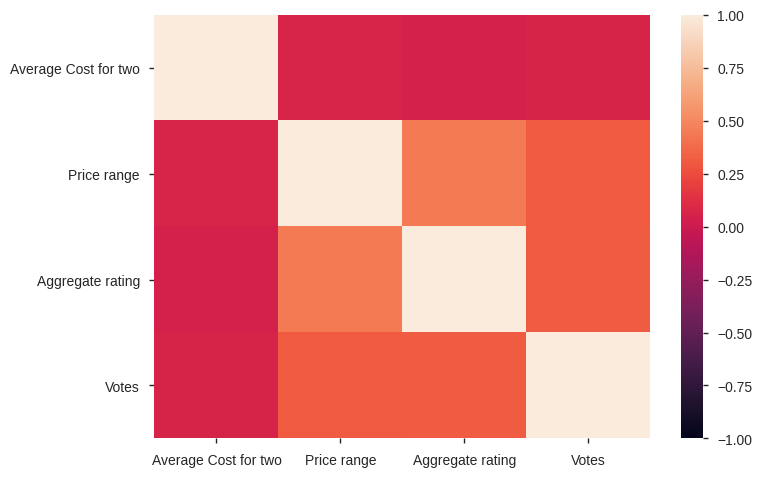

In [35]:
sns.heatmap(correlation,vmin= -1,vmax=1 )

# **Observation**
There is a weak correlation between Aggregate rating and Price range
Other then this there is no correlation


If the Price range is higher, people should rate the restaurant higher.

# **Distribution of aggregate rating**

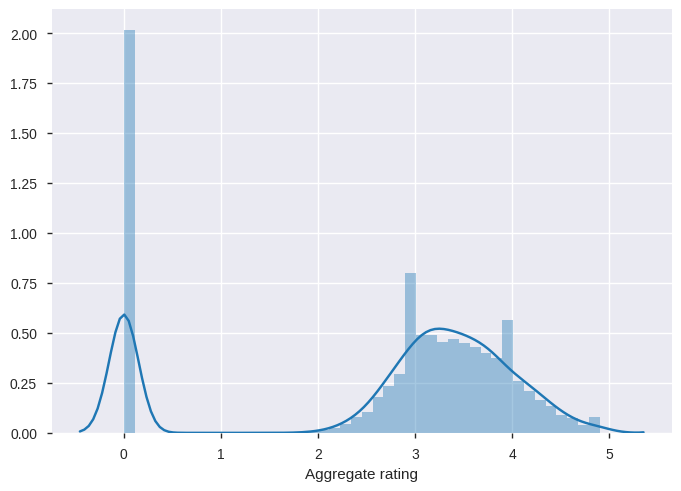

In [36]:
sns.distplot(zomato_data['Aggregate rating'])

**Observation**:  <br>
A lot of restaurants are rated 0. After this most of the restaurants have been rated between 3 and 4.

Below lot shows rating after removing 0 rated entries

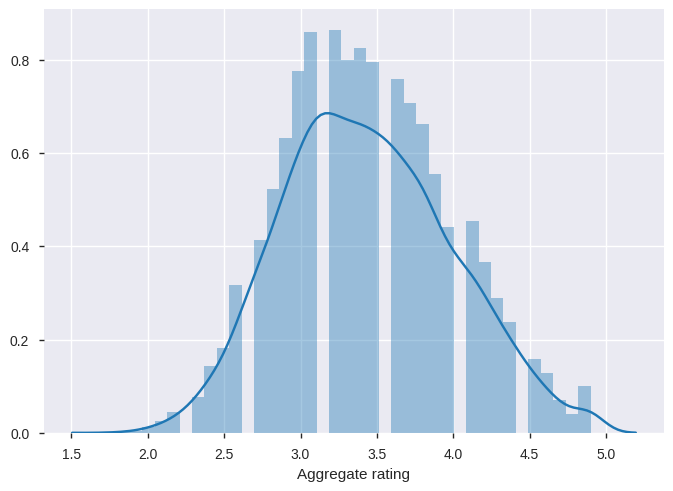

In [37]:
sns.distplot(zomato_data[zomato_data['Aggregate rating']>0]['Aggregate rating'])

### Bivariate Analysis

Here we check the relationship between two variables.

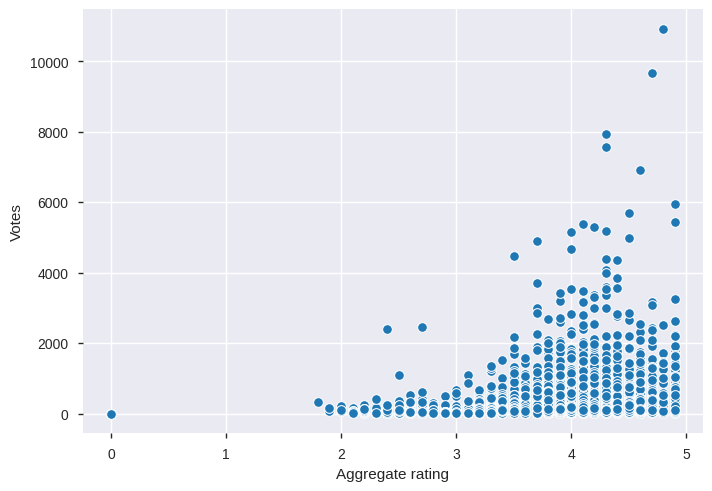

In [38]:
# Relationship between aggregate rating and votes

sns.scatterplot(x=zomato_data['Aggregate rating'], y=zomato_data['Votes'])

 **Obervation**
 
 
 From the above scatter plot we can see that As the quality of food increases, with as the aggregate rating increases, no of votes also increases

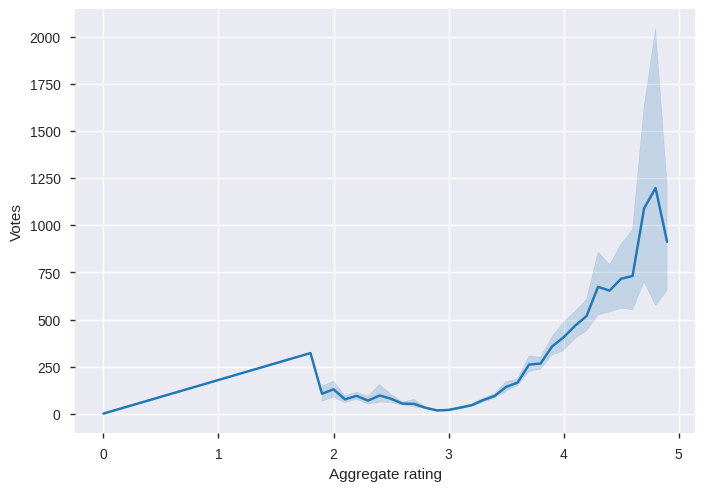

In [39]:
# Relationship between Aggregate Ratings and Votes

sns.lineplot(x=zomato_data['Aggregate rating'], y= zomato_data['Votes'])

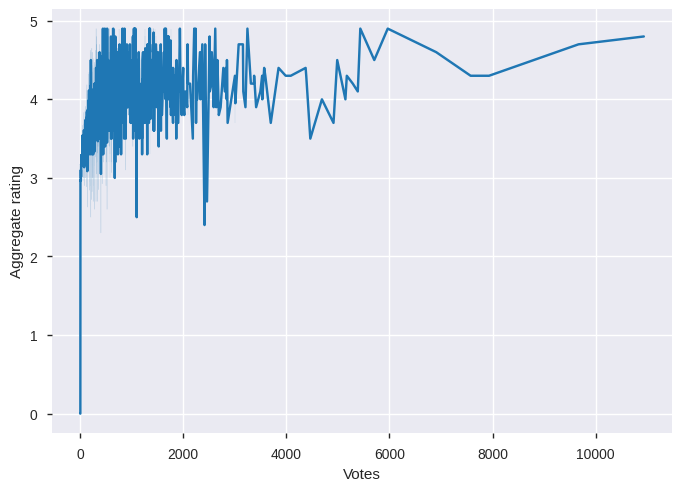

In [40]:
# Relationship between Aggregate Ratings and Votes

sns.lineplot(x=zomato_data['Votes'], y= zomato_data['Aggregate rating'])

**Obeservation** : Here we can see the same inference. Aggregate Ratings and Votes have an increasing trend.

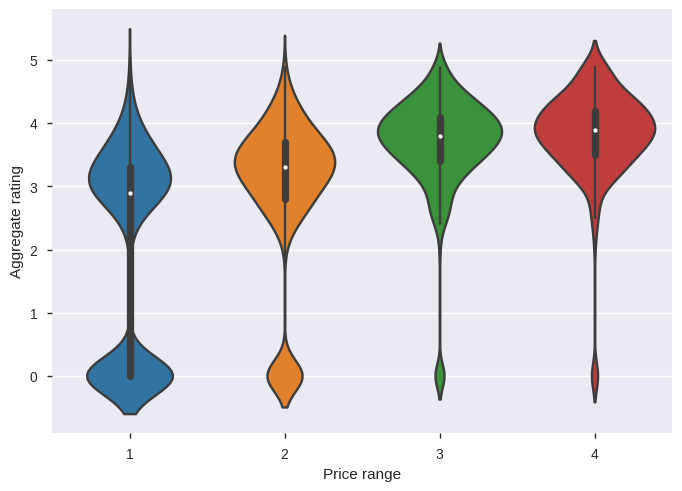

In [41]:
# Relationship between Price range and Aggregate Ratings

sns.violinplot(x='Price range', y='Aggregate rating', data = zomato_data)

**Observation 1** <br>
Here we can clearly see that with increase in Price range, the median of ratings also increase.

**Question: Which countries have the highest number of restaurants in Zomato?**

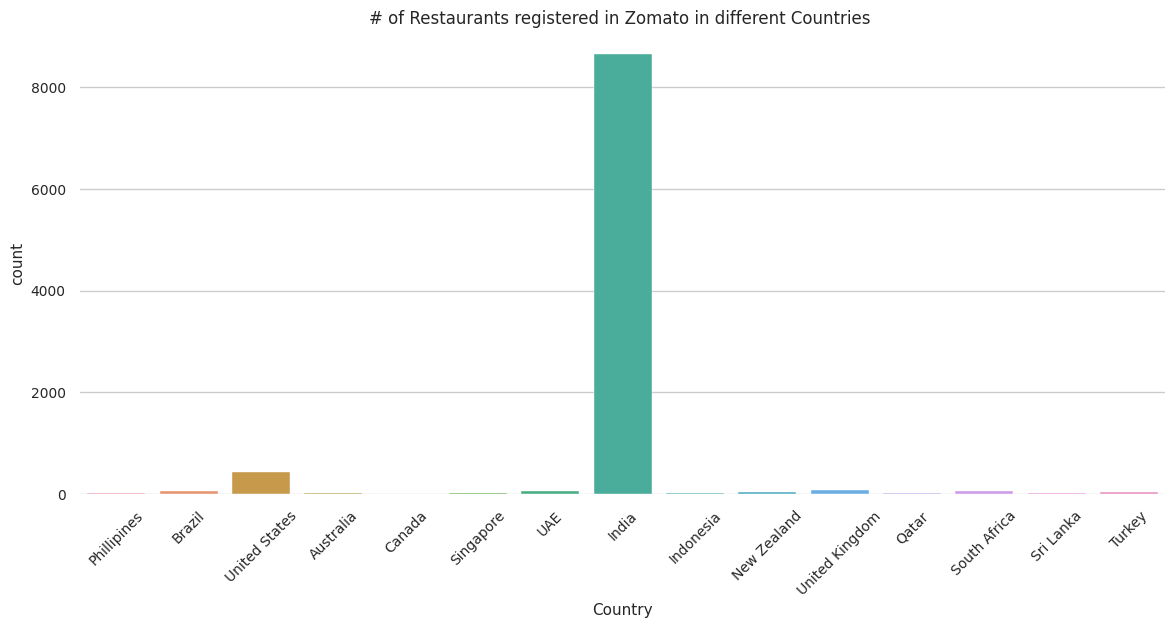

In [45]:
"""
The background is whitegrid
The figure size is 14*6 
The x-axis labels are written with a rotation of 45 degree
setting the title to "# of Restaurants registered in Zomato in different Countries 
"""

sns.set_style('whitegrid')
plt.figure(figsize = (14,6))
sns.countplot(x= 'Country', data=zomato_data)
plt.xticks(rotation=45)
plt.title("# of Restaurants registered in Zomato in different Countries ");

**Observation**


India has maximum resturents : 8652


Rest of the world : 9551

Zomato India:

Our goal is to determine which resturent has the poor rating in Zomato and why ?


The number of restaurants registered in Zomato is highest in India.
So lets look at the data of these restaurants.

In [46]:
zomato_india = zomato_data[zomato_data['Country']=='India']

In [47]:
zomato_india.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Currency_new,Currency_new_code
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140,India,Indian Rupees,Rs.
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71,India,Indian Rupees,Rs.
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94,India,Indian Rupees,Rs.
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,400,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87,India,Indian Rupees,Rs.
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",1000,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177,India,Indian Rupees,Rs.


**We have aggregate ratings and Rating text as two column of interest.**

In [48]:
zomato_india.groupby('Rating text').mean()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
Rating text,,,,,,,,
Average,6.000801e+06,1.0,75.093777,27.697238,548.232735,1.617727,3.048722,47.844209
Excellent,8.174877e+06,1.0,75.245783,21.945669,1173.706897,2.706897,4.646552,1184.206897
Good,6.617615e+06,1.0,74.262800,26.541428,865.522469,2.108825,3.677423,238.798592
Not rated,1.558888e+07,1.0,66.939717,24.793691,341.598878,1.231417,0.000000,0.866293
Poor,2.864800e+06,1.0,76.802650,28.368948,647.777778,1.816667,2.296111,87.550000
Very Good,8.379847e+06,1.0,74.077409,24.585563,1148.771676,2.566474,4.153324,599.929191


**Excellent and Very Good** food ratings are provided in restaurants which are slightly premium cost and high price range.
They also have huge number of votes. This can be due to high quality food or ambience due to which the price is high and so the ratings are good.

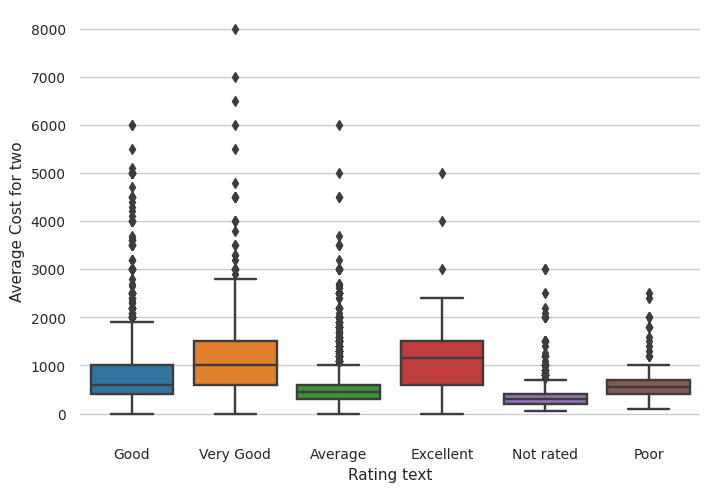

In [50]:
#Relationship between avarage cost of two and rating

sns.boxplot(y = 'Average Cost for two', x = 'Rating text', data=zomato_india)

**Rating improves as avarage cost of two increases**

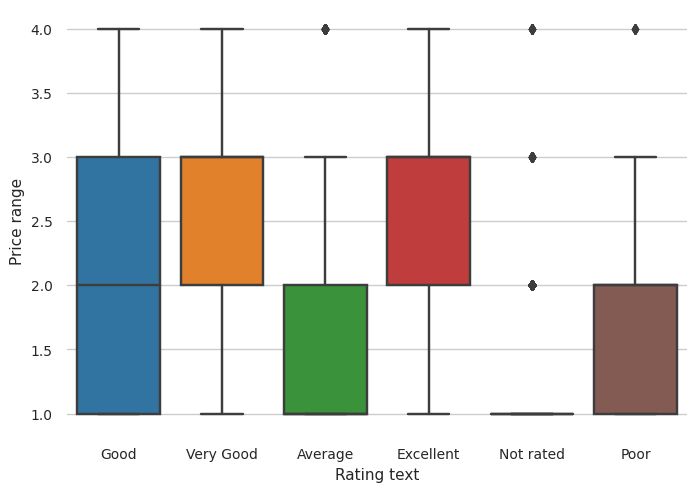

In [51]:
# Relationship between Price range and Rating text

sns.boxplot(y = 'Price range', x = 'Rating text', data = zomato_india)

**Excellent and Very Good** rating resturents have a higher price range

**Average and Poor** rated resturent have a lower price range

### Lets identify restaurants which have high price range and low ratings

In [52]:
zomato_india['Price range'].value_counts()

1    4295
2    2858
3    1111
4     388
Name: Price range, dtype: int64

In [53]:
# Lets have a look at the expensive restaurants

exp_india_restaurant = zomato_india[zomato_india['Price range'] == 4]
exp_india_restaurant

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Currency_new,Currency_new_code
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",2000,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,45,India,Indian Rupees,Rs.
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",2500,Indian Rupees(Rs.),No,No,No,No,4,4.3,Green,Very Good,133,India,Indian Rupees,Rs.
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,2500,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41,India,Indian Rupees,Rs.
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",3600,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,46,India,Indian Rupees,Rs.
638,3400350,Bon Barbecue,1,Agra,"Parador Hotel, 3A-3B, Phase 1, Fatehabad Road,...",Tajganj,"Tajganj, Agra",0.000000,0.000000,"North Indian, Chinese, Continental",1500,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,57,India,Indian Rupees,Rs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9251,3900010,The Great Kabab Factory - Radisson Hotel,1,Varanasi,"Radisson Hotel, The Mall Road, Nadesar, Varanasi","Radisson Hotel, Nadesar","Radisson Hotel, Nadesar, Varanasi",82.980810,25.338373,"North Indian, Mughlai",1100,Indian Rupees(Rs.),No,No,No,No,4,3.3,Orange,Average,67,India,Indian Rupees,Rs.
9252,3900055,I:ba Cafe & Restaurant,1,Varanasi,"B 3/335, Krimkund, Shivala, Varanasi",Shivala,"Shivala, Varanasi",0.000000,0.000000,"Japanese, American, North Indian, Fast Food",1000,Indian Rupees(Rs.),No,No,No,No,4,3.5,Yellow,Good,83,India,Indian Rupees,Rs.
9260,2800052,The Square - Hotel Novotel,1,Vizag,"Hotel Novotel, Beach Road, Maharani Peta, Vizag","Hotel Novotel, Maharani Peta","Hotel Novotel, Maharani Peta, Vizag",83.315935,17.710690,"Continental, North Indian",1700,Indian Rupees(Rs.),No,No,No,No,4,4.1,Green,Very Good,125,India,Indian Rupees,Rs.
9262,2800856,Barbeque Nation,1,Vizag,"1st Floor, ATR Towers, Harbour Park Road, Pan...",Kirlampudi Layout,"Kirlampudi Layout, Vizag",0.000000,0.000000,"North Indian, Chinese, Mediterranean",1600,Indian Rupees(Rs.),No,No,No,No,4,4.9,Dark Green,Excellent,345,India,Indian Rupees,Rs.


In [54]:
# Lets check the ratings of these restaurants

exp_india_restaurant['Rating text'].value_counts()

Good         167
Very Good     97
Average       88
Excellent     20
Not rated     11
Poor           5
Name: Rating text, dtype: int64

As the price range is high, most of the ratings are good.
So if price is high, why will be there be 5 poor ratings?

In [55]:
# Low rated expensive restaurants

exp_india_restaurant[exp_india_restaurant['Rating text'] == 'Poor']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Currency_new,Currency_new_code
1247,306134,The Wine Company,1,Gurgaon,"Cyber Hub, DLF Cyber City, Gurgaon","Cyber Hub, DLF Cyber City","Cyber Hub, DLF Cyber City, Gurgaon",77.089048,28.496228,"Italian, European",2000,Indian Rupees(Rs.),Yes,No,No,No,4,2.4,Red,Poor,2412,India,Indian Rupees,Rs.
8045,718,Americana Kitchen and Bar,1,Noida,"Ist Floor, 1-6, Centre Stage Mall, Sector 18, ...","Centre Stage Mall, Sector 18","Centre Stage Mall, Sector 18, Noida",77.322828,28.568343,"American, Tex-Mex, Italian, Mexican, North Indian",2000,Indian Rupees(Rs.),Yes,No,No,No,4,2.4,Red,Poor,221,India,Indian Rupees,Rs.
8467,4717,RPM - Zanzi Bar,1,Noida,"B-110, Gautam Budh Nagar, Sector 18, Noida",Sector 18,"Sector 18, Noida",77.325299,28.570669,"Chinese, North Indian",2000,Indian Rupees(Rs.),Yes,No,No,No,4,2.4,Red,Poor,103,India,Indian Rupees,Rs.
9050,3212,Chicane,1,Noida,"205-A, 1st Floor, Spice World Mall, Sector 25-...","Spice World Mall, Sector 25","Spice World Mall, Sector 25, Noida",77.341021,28.585493,"European, North Indian, Chinese",2500,Indian Rupees(Rs.),Yes,No,No,No,4,2.2,Red,Poor,116,India,Indian Rupees,Rs.
9105,3237,Club Ice Cube,1,Noida,"313, 3rd Floor, The Great India Place Mall, Se...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326475,28.568067,"North Indian, Continental, Chinese",2400,Indian Rupees(Rs.),Yes,No,No,No,4,2.0,Red,Poor,230,India,Indian Rupees,Rs.


In [56]:
list_of_cuisines = exp_india_restaurant[exp_india_restaurant['Rating text'] == 'Poor']['Cuisines']
list_of_cuisines.values

array(['Italian, European',
       'American, Tex-Mex, Italian, Mexican, North Indian',
       'Chinese, North Indian', 'European, North Indian, Chinese',
       'North Indian, Continental, Chinese'], dtype=object)

**Observations**: These are 5 restaurants which are really expensive but do not have good ratings. <br>
**Lets have a look at what is their cuisines.**

In [57]:
text = ' '.join([j for j in list_of_cuisines.values])
text

'Italian, European American, Tex-Mex, Italian, Mexican, North Indian Chinese, North Indian European, North Indian, Chinese North Indian, Continental, Chinese'

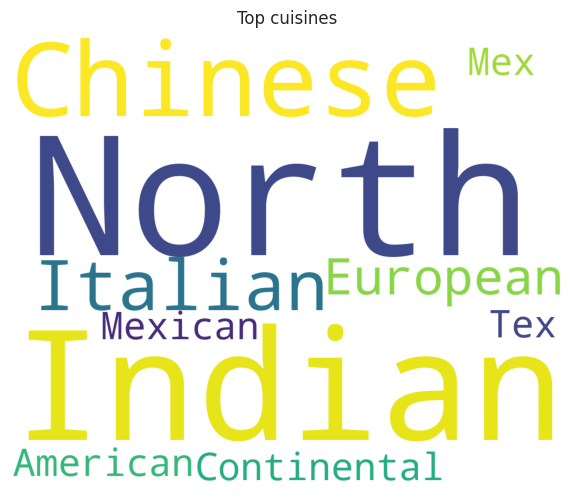

In [58]:
# Wordcloud of Cuisine

from wordcloud import WordCloud

plt.figure(figsize = (12, 6))
text = ' '.join([j for j in list_of_cuisines.values])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top cuisines')
plt.axis("off")
plt.show()

North Indian is the most popular cuisine. So we can infer that these North Indian restaurants in Gurgaon and Noida which do not provide authentic North Indian dishes and that is why customers are unhappy and rate them poorly.

In [59]:
bad_rated_restaurants = zomato_india[zomato_india['Rating text'] == 'Poor']
bad_rated_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Currency_new,Currency_new_code
890,311051,KFC,1,Faridabad,"Shops 21-22, 2nd Floor, Crown Interiorz Mall, ...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307060,28.469807,"American, Fast Food, Burger",500,Indian Rupees(Rs.),No,Yes,No,No,2,2.1,Red,Poor,57,India,Indian Rupees,Rs.
896,8128,Mirage Restro Bar,1,Faridabad,"2nd Floor, Crown Plaza Mall, Sector 15-A, Sect...","Crown Plaza Mall, Sector 15, Faridabad","Crown Plaza Mall, Sector 15, Faridabad, Faridabad",77.313102,28.397808,"North Indian, Mughlai",1000,Indian Rupees(Rs.),Yes,No,No,No,3,2.4,Red,Poor,25,India,Indian Rupees,Rs.
1138,1683,Pind Balluchi,1,Ghaziabad,"Shop 34-40, Level 3, Shipra Mall, Gulmohar Roa...","Shipra Mall, Indirapuram","Shipra Mall, Indirapuram, Ghaziabad",77.370165,28.633970,"North Indian, Mughlai",1000,Indian Rupees(Rs.),Yes,Yes,No,No,3,1.8,Red,Poor,322,India,Indian Rupees,Rs.
1247,306134,The Wine Company,1,Gurgaon,"Cyber Hub, DLF Cyber City, Gurgaon","Cyber Hub, DLF Cyber City","Cyber Hub, DLF Cyber City, Gurgaon",77.089048,28.496228,"Italian, European",2000,Indian Rupees(Rs.),Yes,No,No,No,4,2.4,Red,Poor,2412,India,Indian Rupees,Rs.
1263,225,Domino's Pizza,1,Gurgaon,"UGF/RTC 9, Building 8, Tower C, DLF- 2, DLF Cy...",DLF Cyber City,"DLF Cyber City, Gurgaon",77.089048,28.494525,"Pizza, Fast Food",700,Indian Rupees(Rs.),No,No,No,No,2,2.4,Red,Poor,125,India,Indian Rupees,Rs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9069,428,Sagar Ratna,1,Noida,"C-134/B, Supertech Shopprix Mall, Sector 61, N...","Supertech Shopprix Mall, Sector 61","Supertech Shopprix Mall, Sector 61, Noida",77.364833,28.597103,"South Indian, North Indian, Chinese",600,Indian Rupees(Rs.),No,Yes,No,No,2,2.3,Red,Poor,155,India,Indian Rupees,Rs.
9070,18070483,Subway,1,Noida,"Shop 3, Supertech Shopprix Mall, Sector 61, Noida","Supertech Shopprix Mall, Sector 61","Supertech Shopprix Mall, Sector 61, Noida",77.364981,28.596898,"American, Fast Food, Salad, Healthy Food",500,Indian Rupees(Rs.),No,Yes,No,No,2,2.3,Red,Poor,24,India,Indian Rupees,Rs.
9104,2979,Chopaal,1,Noida,"A-2, 3rd Floor, The Great India Place Mall, Se...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.325308,28.567150,"Chinese, North Indian, South Indian, Fast Food",450,Indian Rupees(Rs.),No,No,No,No,1,2.0,Red,Poor,161,India,Indian Rupees,Rs.
9105,3237,Club Ice Cube,1,Noida,"313, 3rd Floor, The Great India Place Mall, Se...","The Great India Place, Sector 38","The Great India Place, Sector 38, Noida",77.326475,28.568067,"North Indian, Continental, Chinese",2400,Indian Rupees(Rs.),Yes,No,No,No,4,2.0,Red,Poor,230,India,Indian Rupees,Rs.


In [60]:
bad_rated_restaurants.shape

(180, 24)

In [61]:
bad_rated_restaurants['Has Online delivery'].value_counts()

Yes    116
No      64
Name: Has Online delivery, dtype: int64

In [62]:
bad_rated_restaurants['Is delivering now'].value_counts()

No     179
Yes      1
Name: Is delivering now, dtype: int64

Many of these restaurants are not available for delivery most of the time. Hence people provide poor rating to them.

# **City wise Analysis of Poor Rated restaurants**

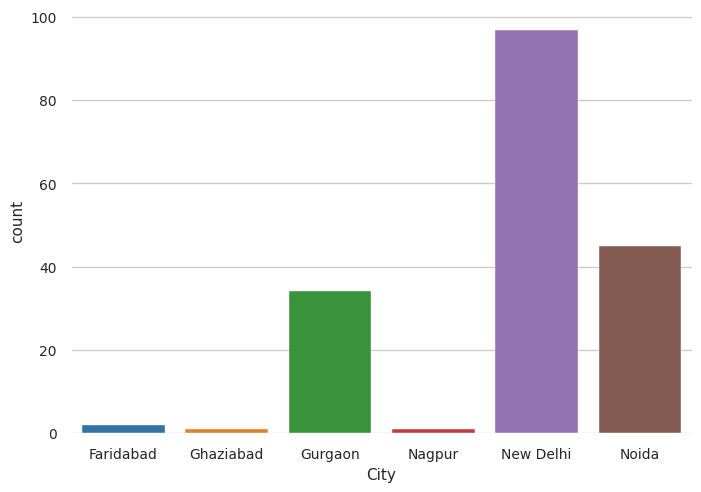

In [63]:
sns.countplot(x = 'City', data = bad_rated_restaurants)

Why are ratings of New Delhi, Noida and Gurgaon bad?

In [64]:
# Total no. of bad restaurants

bad_rated_restaurants['City'].value_counts()

New Delhi    97
Noida        45
Gurgaon      34
Faridabad     2
Ghaziabad     1
Nagpur        1
Name: City, dtype: int64

In [65]:
# Total number of restaurants

top_3_cities = zomato_india['City'].value_counts().head(3)
top_3_cities

New Delhi    5473
Gurgaon      1118
Noida        1080
Name: City, dtype: int64

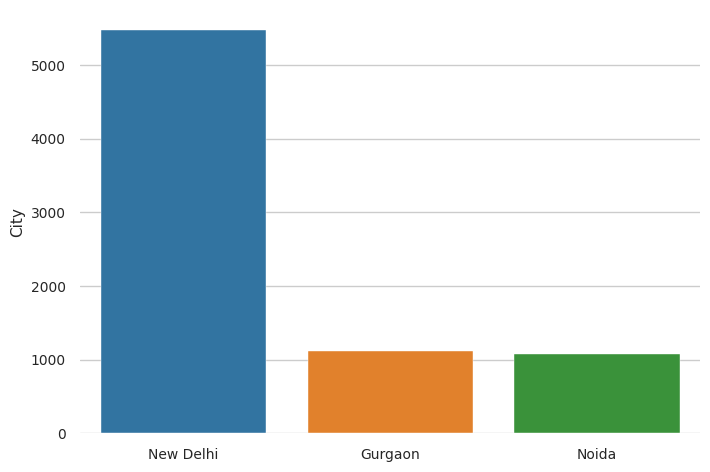

In [66]:
sns.barplot(y = top_3_cities, x = top_3_cities.index)

**Hence we cannot conclude that these 3 cities have significantly large number of bad restaurants as the total number of restaurants is also high**

# Let's make our plots interactive using Plotly-express

In [67]:
!pip install plotly_express

In [68]:
import plotly_express as px

In [69]:
# Scatter Plot

px.scatter(zomato_data, x="Average Cost for two", y="Votes", size="Votes", color="Rating text", log_x=True, size_max=60,hover_name='City')

**Observation**: We can see how the Average Cost for two and the Votes are related and in which cities.

In [70]:
# Scatter Plot

px.scatter_matrix(zomato_data, dimensions=['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'], color='Rating text')

**Observation** : There is not much correlation between the variables.

In [71]:
# Box plot of Rating text and Average Cost for two

px.box(zomato_india, x="Rating text", y="Average Cost for two", color="Price range", notched=True)

**Observation**: Good and Very Good food have very high cost as compared to excellent and other types of food.

In [72]:
# Relationship between Online Delivery and Aggregate rating

px.histogram(zomato_data, x="Has Online delivery", y="Aggregate rating", histfunc="avg")

**Observations**: Restaurants which have online delivery have better ratings.

In [73]:
px.histogram(zomato_data, x="Has Table booking", y="Aggregate rating", histfunc="avg")

**Observations**: Restaurants which have table booking available have more ratings in general

In [74]:
px.histogram(zomato_data, x="Is delivering now", y="Aggregate rating", histfunc="avg")

**Observation**: Restaurants which are delivering now have better ratings than the one which are not.